In [199]:
import math
import numpy as np
from PIL import Image

## 1. Convolution

In [100]:
#sigmoid function
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

In [3]:
#tanh
def tanh(x):
    x = np.array(x,dtype=np.float128)
    tanh = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    return tanh

In [4]:
#RelU
def RelU(x):
    return np.maximum(0,x)
    

In [5]:
#Parametric RelU
def ParRelU(x,alpha=0.1):
    return np.maximum(0,x) + alpha*(np.minimum(0,x))
    
    

In [6]:
#flip the image
def flip_image(image):
    image_copy = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image_copy[i][j] = image[image.shape[0]-i-1,image.shape[1]-j-1]
    return image_copy

In [7]:
def padding_image(image,padding):
    r = padding
    s = padding
    
    W = image.shape[0]
    H = image.shape[1]
    C = image.shape[2]
    
    padded_array = np.zeros((W+2*r,H+2*s,C))
    padded_array[r:W+r,s:H+s] = image
    return padded_array

In [8]:
# #sigmoid function
# def sigmoid(x):
#     W = x.shape[0]
#     H = x.shape[1]

#     array = x.flatten()
#     length = W*H
#     for i in range(length):
#         array[i] = 1 / (1 + math.exp(-array[i]))
#     return array.reshape((W,H))

In [9]:
def conv(image,kernel,stride,padding,act_function):
    kernel = flip_image(kernel)
    padded_image = padding_image(image,padding)
    
    H = padded_image.shape[0]
    W = padded_image.shape[1]
    C = padded_image.shape[2]
    
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    
    r = k_h//2
    s = k_w//2
    
    conv_h = (int((H-k_h)/stride) + 1)
    conv_w = (int((W-k_w)/stride) + 1)
    
    conv_image = np.zeros((conv_h,conv_w))
    


    j1=0
    for j in range(r,H-r,stride):  
        k1=0
        for k in range(s,W-s,stride):
            sum_value = 0
            for m in range(k_h):
                for n in range(k_w):
                    sum_value = sum_value + np.sum(np.multiply(kernel[m,n],padded_image[j-r+m,k-s+n]))
            conv_image[j1,k1] = sum_value
            k1+=1
        j1+=1
    return act_function(conv_image/np.sum(conv_image))
                
            
    

In [10]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo,encoding='bytes')
    return dict

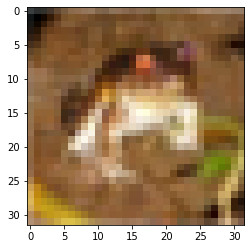

In [11]:
cifar = unpickle("D:\Classes\Deep Learning\Assignments\cifar\cifar-10-batches-py\data_batch_1")

data = cifar[b'data']

#Input Image
import matplotlib.pyplot as plt
array = np.reshape(data[0],(3,32,32)).transpose(1,2,0)
plt.imshow(array)

In [12]:
#Filter kernel
kernel = np.random.rand(3,3,3)

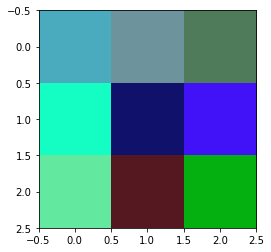

In [13]:
#Kernel plot
plt.imshow(kernel)

In [14]:
#Convolution of image
conv_im = conv(array,kernel,stride=1,padding=2,act_function=sigmoid)

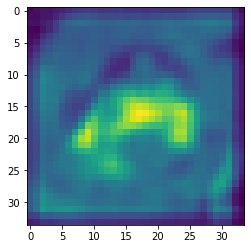

In [15]:
#Output activation map
plt.imshow((conv_im))

## 2) Pooling function

In [20]:
#Max Pooling
def max_pool(image,stride,pool_size):
    H = image.shape[0]
    W = image.shape[1]
    pool_h = ((H-pool_size)//stride) + 1
    pool_w = ((W-pool_size)//stride) + 1 
    pooled_array = np.zeros((pool_h,pool_w))
    i1 = 0
    for i in range(0,H-pool_size+1,stride):
        j1 = 0
        for j in range(0,W-pool_size+1,stride):
            pooled_array[i1,j1] = np.max(image[i:i+pool_size,j:j+pool_size])
            j1+=1
        i1+=1
    return pooled_array
        
            
    

In [21]:
#Avg Pooling
def avg_pool(image,stride,pool_size):
    H = image.shape[0]
    W = image.shape[1]
    pool_h = ((H-pool_size)//stride) + 1
    pool_w = ((W-pool_size)//stride) + 1 
    pooled_array = np.zeros((pool_h,pool_w))
    i1 = 0
    for i in range(0,H-pool_size+1,stride):
        j1 = 0
        for j in range(0,W-pool_size+1,stride):
            pooled_array[i1,j1] = np.average(image[i:i+pool_size,j:j+pool_size])
            j1+=1
        i1+=1
    return pooled_array

In [22]:
def pooling(image,stride,pool_fn,pool_size):
    return(pool_fn(image,stride,pool_size))


## 3)Convolution layer function

In [23]:
def conv_layer(image,kernels,stride,padding,act_function):
    
    kernel_depth = len(kernels)
    conv_h = (int((image.shape[0]-3 + 2*padding)/stride) + 1)
    conv_w = (int((image.shape[1]-3 + 2*padding)/stride) + 1)
    
    conv_output = np.zeros((conv_h,conv_w,kernel_depth))
    
    for i in range(kernel_depth):
#         kernel = np.random.randint(2,size = kernel_size)
        conv_output[:,:,i] = conv(image,kernels[i],stride,padding,act_function)
    return conv_output
    

In [24]:
def get_kernels(number,size):
    kernels = []
    W = size[0]
    H = size[1]
    C = size[2]
    for i in range(number):
        kernel = np.random.rand(W,H,C)
        
        kernels.append(kernel)
    return kernels

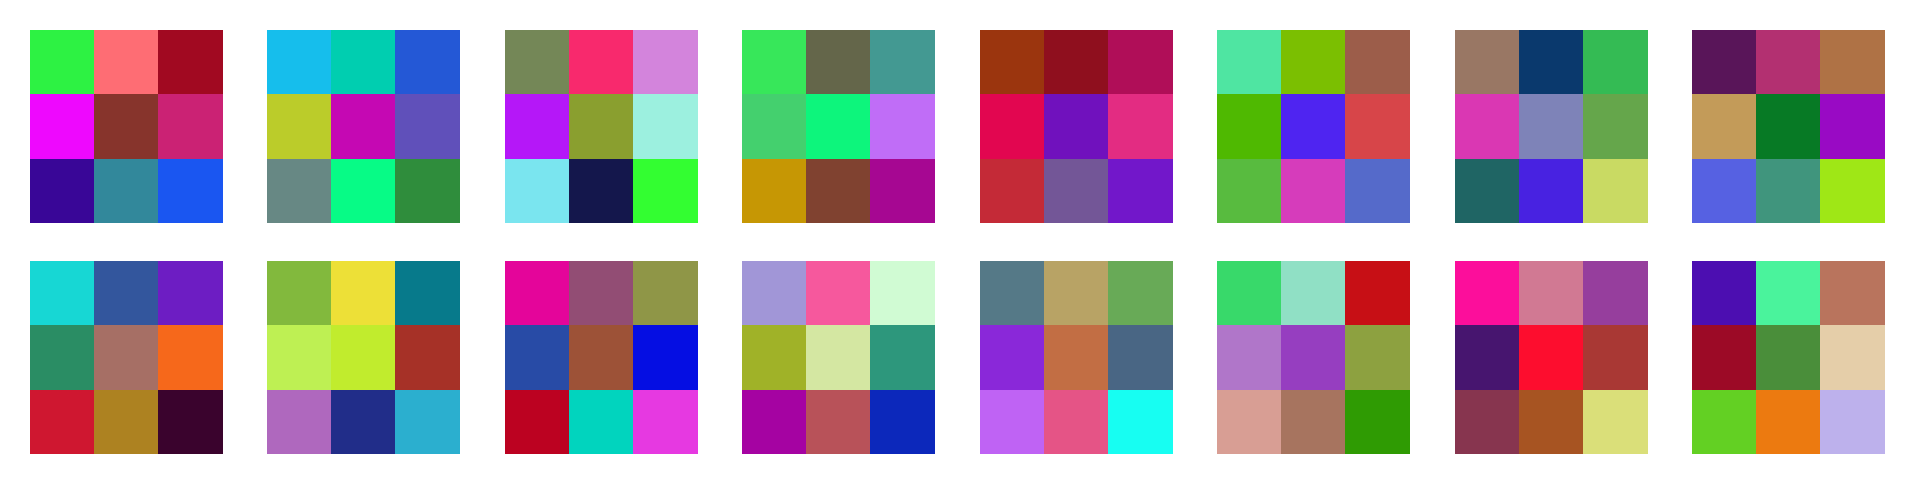

In [76]:
#Kernels
kernels = get_kernels(16,(3,3,3))

fig = plt.figure(figsize=(8,8),dpi=300)
rows = len(kernels)//2
columns =len(kernels)//2

for i in range(1,len(kernels)+1):
    fig.add_subplot(rows,columns,i)
    plt.axis('off')
    plt.imshow(kernels[i-1])

In [80]:
#Conv layer output
conv_output = conv_layer(array,kernels=kernels,stride=2,padding=2,act_function=sigmoid)

In [27]:
#Input shape
array.shape

(32, 32, 3)

In [28]:
#Conv layer output shape
conv_output.shape

(17, 17, 16)

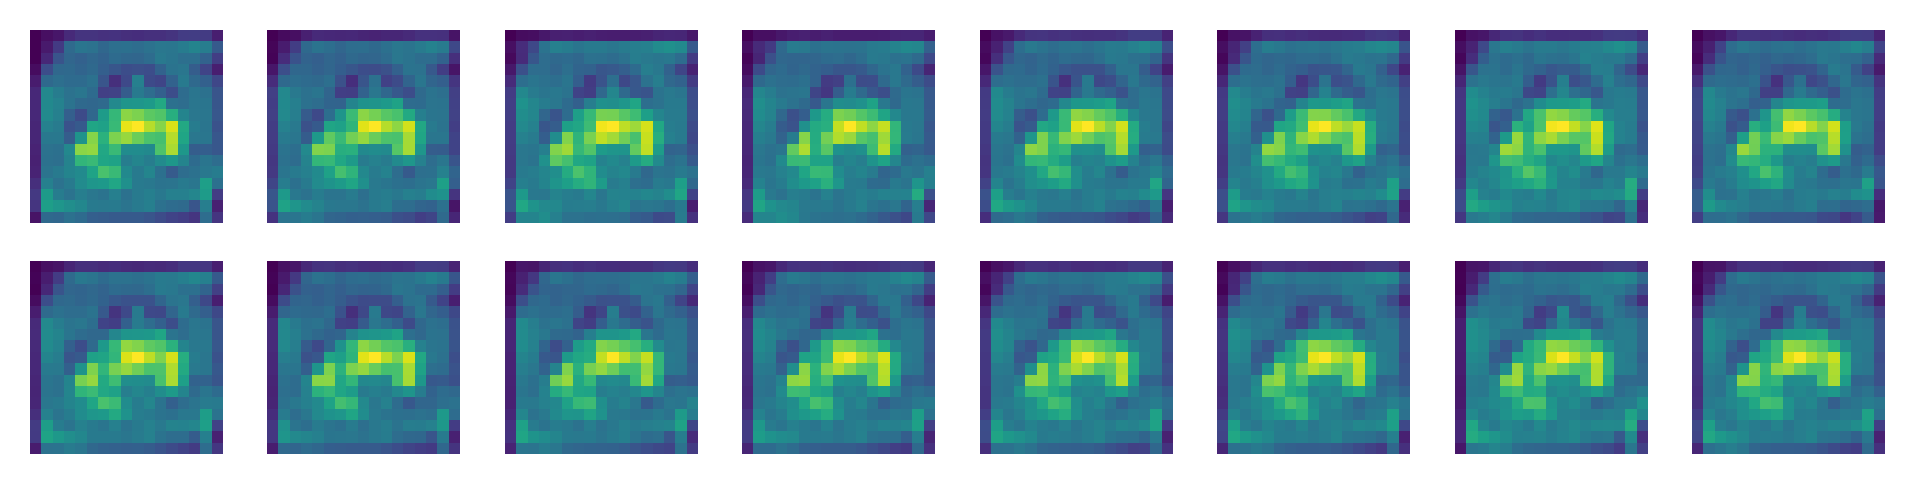

In [29]:
#Activation maps 
fig = plt.figure(figsize= (8,8),dpi=300)
rows = conv_output.shape[2]//2
columns = conv_output.shape[2]//2

for i in range(1,conv_output.shape[2]+1):
    fig.add_subplot(rows,columns,i)
    plt.axis('off')
    plt.imshow(conv_output[:,:,i-1])

    

## 4)Pooling layer function

In [30]:
def pooling_layer(act_map,pool_fn,stride,pool_size):
    H = act_map.shape[0]
    W = act_map.shape[1]
    C = act_map.shape[2]
    pool_h = ((H-pool_size)//stride) + 1
    pool_w = ((W-pool_size)//stride) + 1 
    
    pool_output = np.zeros((pool_h,pool_w,C))
    
    for i in range(C):
        pool_output[:,:,i] = pool_fn(act_map[:,:,i],stride,pool_size)
    return pool_output

In [31]:
pool_output = pooling_layer(conv_output,max_pool,stride=2,pool_size=2)

In [32]:
pool_output.shape

(8, 8, 16)

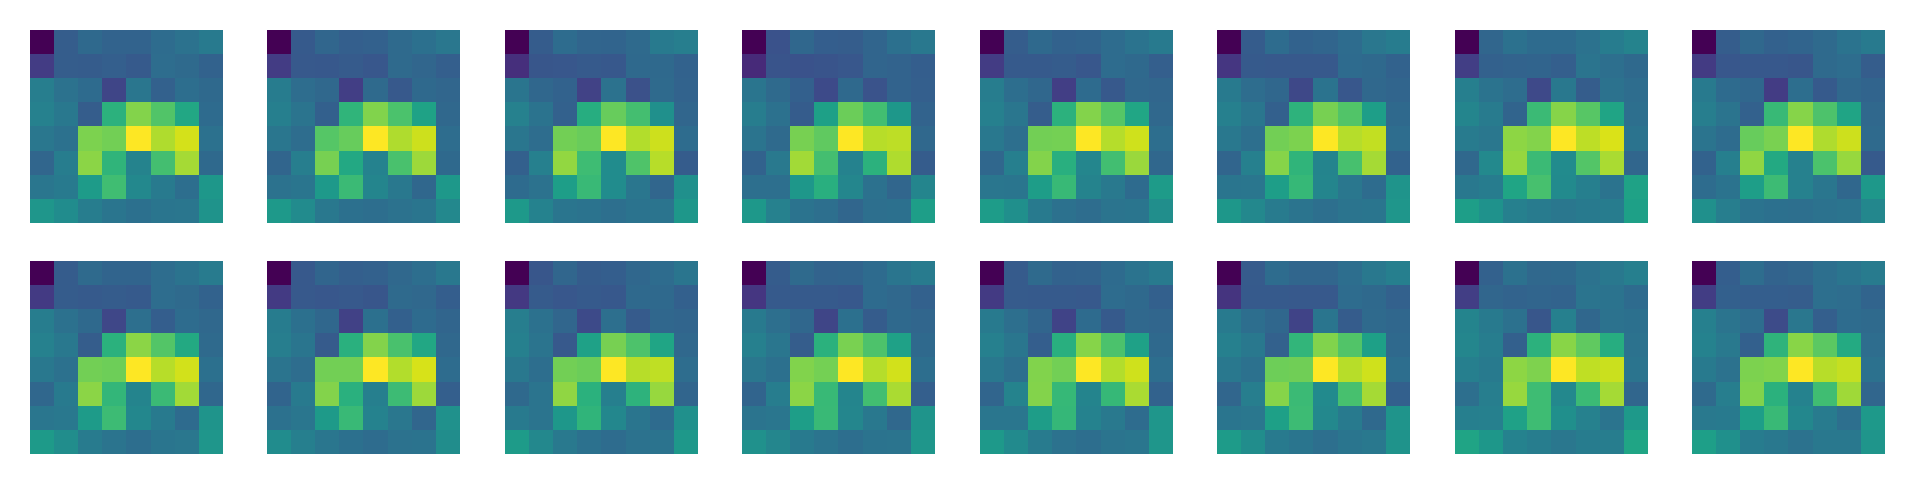

In [33]:
#Pooling maps 
fig = plt.figure(figsize= (8,8),dpi=300)
rows = pool_output.shape[2]//2
columns = pool_output.shape[2]//2

for i in range(1,pool_output.shape[2]+1):
    fig.add_subplot(rows,columns,i)
    plt.axis('off')
    plt.imshow(pool_output[:,:,i-1])


## 5) Flattening(unravelling) function

In [34]:
def flattening_layer(act_maps,size):
    H = act_maps.shape[0]
    W = act_maps.shape[1]
    C = act_maps.shape[2]
    
    feature_size = act_maps.shape[0]*act_maps.shape[1]*act_maps.shape[2]
    flatten_array = np.random.rand(size,feature_size)
    flattened_input = np.zeros(feature_size)
    ind = 0
    for i in range(C):
        for j in range(W):
            for k in range(H):
                flattened_input[ind] = act_maps[k,j,i]
                ind+=1
    return np.matmul(flatten_array,flattened_input.reshape((feature_size,1)))

In [35]:
flattened_output = flattening_layer(pool_output,100)

## 6) MLP

In [188]:
def MLP(vector,hidden_layers,hidden_layer_size,act_function,output_size,softmax=True):
    def softmax_fn(x):
        length = x.shape[0]   
        exp = np.exp(x)
        x = exp/sum(exp)
        return x
    
    weights = []

    for i in range(hidden_layers):
        if i == 0:
            np.random.seed(0)
            weight = np.random.rand(hidden_layer_size[i],vector.shape[0]+1)
            weights.append(weight)
        elif i > 0:
            np.random.seed(0)
            weight = np.random.rand(hidden_layer_size[i],hidden_layer_size[i-1]+1)
            weights.append(weight)
    np.random.seed(0)
    weight = np.random.rand(output_size,hidden_layer_size[len(hidden_layer_size)-1]+1)
    weights.append(weight)

    inputs = []
    inputs.append(vector)
    for i in range(hidden_layers+1):
        outputs = act_function(np.matmul(weights[i],np.insert(inputs[i],0,1,axis=0)))
        inputs.append(outputs)

    if softmax:
        return(softmax_fn(inputs[-1]))
    else:
        return(inputs[-1])

In [153]:
#MLP output with softmax
output = MLP(flattened_output,1,[20],sigmoid,10)
output

array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [155]:
#MLP output without softmax
output = MLP(flattened_output,2,[30,20],sigmoid,10,softmax=False)
output

array([[0.99999666],
       [0.99998598],
       [0.99970431],
       [0.99982795],
       [0.99993196],
       [0.99999834],
       [0.99997034],
       [0.99999495],
       [0.99994041],
       [0.99979217]])

## 7)Feed-forward path

In [124]:
kernels1 = get_kernels(16,size=(3,3,3))
kernels2 = get_kernels(8,size=(3,3,16))

#### The C2 value for the second conv layer is the number of channels in the output of the previous layer. C2 = 16

In [189]:
def feedforward_path(image,output_size):
    print("Input Image shape: ",image.shape)
#     kernels1 = get_kernels(16,size=(3,3,image.shape[2]))
    conv_output1 = conv_layer(image,kernels=kernels1,stride=1,padding=0,act_function=sigmoid)
    print("\nOutput shape of first conv layer: ",conv_output1.shape)
    pool_output1 = pooling_layer(conv_output1,max_pool,stride=2,pool_size=2)
    print("\nOutput shape of first pool layer: ",pool_output1.shape)
#     kernels2 = get_kernels(8,size=(3,3,pool_output.shape[2]))
    conv_output2 = conv_layer(pool_output1,kernels=kernels2,stride=1,padding=0,act_function=sigmoid)
    print("\nOutput shape of second conv layer: ",conv_output2.shape)
    pool_output2 = pooling_layer(conv_output2,max_pool,stride=2,pool_size=2)
    print("\nOutput shape of second pool layer: ",pool_output2.shape)
    flattened_output = flattening_layer(pool_output2,100)
    print("\nFlattened output layer shape: ",flattened_output.shape)
    output = MLP(flattened_output,hidden_layers=1,hidden_layer_size=[20],act_function=sigmoid,output_size=output_size,softmax=True)
    print("\n Output of MLP shape: ",output.shape)
    return output

In [161]:
# cifar = unpickle("D:\Classes\Deep Learning\Assignments\cifar\cifar-10-batches-py\data_batch_1")
data = cifar[b'data']
labels = cifar[b'labels']


## 8) (a)

In [143]:
#Cifar images
class_1_input = np.reshape(data[labels.index(0)],(3,32,32)).transpose(1,2,0)
class_2_input = np.reshape(data[labels.index(1)],(3,32,32)).transpose(1,2,0)
class_3_input = np.reshape(data[labels.index(2)],(3,32,32)).transpose(1,2,0)
class_4_input = np.reshape(data[labels.index(3)],(3,32,32)).transpose(1,2,0)
class_5_input = np.reshape(data[labels.index(4)],(3,32,32)).transpose(1,2,0)
class_6_input = np.reshape(data[labels.index(5)],(3,32,32)).transpose(1,2,0)
class_7_input = np.reshape(data[labels.index(6)],(3,32,32)).transpose(1,2,0)
class_8_input = np.reshape(data[labels.index(7)],(3,32,32)).transpose(1,2,0)
class_9_input = np.reshape(data[labels.index(8)],(3,32,32)).transpose(1,2,0)
class_10_input = np.reshape(data[labels.index(9)],(3,32,32)).transpose(1,2,0)


In [190]:
output = feedforward_path(class_1_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


In [191]:
output = feedforward_path(class_2_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


In [192]:
feedforward_path(class_3_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [193]:
feedforward_path(class_4_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [194]:
feedforward_path(class_5_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [195]:
feedforward_path(class_6_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [196]:
feedforward_path(class_7_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [197]:
feedforward_path(class_8_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

In [198]:
feedforward_path(class_9_input,10)

Input Image shape:  (32, 32, 3)

Output shape of first conv layer:  (30, 30, 16)

Output shape of first pool layer:  (15, 15, 16)

Output shape of second conv layer:  (13, 13, 8)

Output shape of second pool layer:  (6, 6, 8)

Flattened output layer shape:  (100, 1)

 Output of MLP shape:  (10, 1)


array([[0.10000824],
       [0.10000717],
       [0.099979  ],
       [0.09999136],
       [0.10000176],
       [0.1000084 ],
       [0.1000056 ],
       [0.10000806],
       [0.10000261],
       [0.09998779]])

### It looks like all the output vectors are same regardless of the input. Since the all the outputs of the first hidden layer become 1, because of the sigmoid function, the output after the hidden layer is just the sum of the weights, which remains the same regardless of the input. Hence the output after softmax gives the same vector.

## 8)(b)

In [459]:
from sklearn.manifold import TSNE

In [460]:
def get_images(number,cls):
    class_labels = [i for i in range(len(labels)) if labels[i]==cls]
    image_list = []
    for i in range(number): 
        class_1 = np.reshape(data[class_labels[np.random.randint(0,len(class_labels))]],(3,32,32)).transpose(1,2,0)
        image_list.append(class_1)

    return image_list


In [461]:
def flattened_output(image,output_size):
#     print("Input Image shape: ",image.shape)
    kernels1 = get_kernels(16,size=(3,3,image.shape[2]))
    conv_output1 = conv_layer(image,kernels=kernels1,stride=1,padding=0,act_function=sigmoid)
#     print("\nOutput shape of first conv layer: ",conv_output1.shape)
    pool_output1 = pooling_layer(conv_output1,max_pool,stride=2,pool_size=2)
#     print("\nOutput shape of first pool layer: ",pool_output1.shape)
    kernels2 = get_kernels(8,size=(3,3,pool_output.shape[2]))
    conv_output2 = conv_layer(pool_output1,kernels=kernels2,stride=1,padding=0,act_function=sigmoid)
#     print("\nOutput shape of second conv layer: ",conv_output2.shape)
    pool_output2 = pooling_layer(conv_output2,max_pool,stride=2,pool_size=2)
#     print("\nOutput shape of second pool layer: ",pool_output2.shape)
    flattened_output = flattening_layer(pool_output2,output_size)
    return flattened_output

In [462]:
class_1 = get_images(3,0)
class_2 = get_images(3,1)
class_3 = get_images(3,2)
class_4 = get_images(3,3)
class_5 = get_images(3,4)
class_6 = get_images(3,5)
class_7 = get_images(3,6)
class_8 = get_images(3,7)
class_9 = get_images(3,8)
class_10 = get_images(3,9)

In [463]:
images_list = [class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10]

In [464]:
output_list = []
for i in range(10):
    for j in range(3):
        output = flattened_output(images_list[i][j],10)
        output_list.append(output)
        
    

In [465]:
output_array = np.array(output_list)

In [466]:
output_array = output_array.reshape((30,10))

In [467]:
tsne = TSNE(n_components=2)

In [468]:
X_output = tsne.fit_transform(output_array)

C:\Users\aksha\miniconda3\envs\tfgpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\aksha\miniconda3\envs\tfgpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [469]:
color = ['blue']*3 + ['red']*3 + ['orange']*3 + ['brown']*3+ ['black']*3 + ['yellow']*3 + ['violet']*3 + ['green']*3 + ['pink']*3 + ['maroon']*3

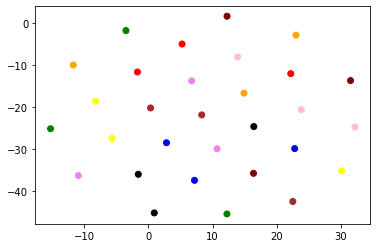

In [563]:
#TSNE Output
plt.scatter(x=X_output[:,0],y=X_output[:,1],c=color)

   ## The randomly initialized network does not show any discriminability within classes.